# Ford GoBike Data Analysis
## by Akhil Sharma

## Investigation Overview

In this investigation, I will be analyzing data collected from Ford GoBike, a bay area bike share system. I will see the trends over time, difference based on age, gender, user type and other details which provides us with insight in to how GoBike's ride sharing system is working.

## Dataset Overview

Data set provides has information about trips over the past 2 years. Each data row has information about the starting station, ending station, start time, end time, trip duration, user type, user gender, user's birth year. It is good amount of data, with information on close to 3-4 million rides.  Let's explore the data and check what we can find from this data set.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
# Since we have stored the clean data in a file from our exploratory data analysis,
# we will simply load that data file for our work here
df = pd.read_csv('fordgobike_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Ford GoBike's Growth Over Time

- Data for Ford GoBike is available from 2017 onwards until April 2019 
- In April 2019, GoBike registerd approx 225000 trips
- In June of 2017, total register trips were well below 50000

Over the years, GoBike has grown and the visula below show this growth. Visual shows number of rides increasing month over month. It is an indication that this service is getting popular with people day by day as more and more people are ready to share their bike ride.

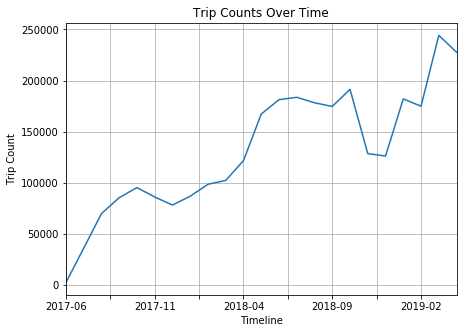

In [8]:
# How bike trip business has grown over the years?

dfx = df.groupby(['year_month'])['bike_id'].count().reset_index().sort_values(by='year_month')

dfx.plot(x='year_month', y='bike_id', legend=None, figsize=(7,5))
plt.xlabel('Timeline')
plt.ylabel('Trip Count')
plt.title('Trip Counts Over Time')
plt.grid();


## Identify Trip Patterns with respect to time

Analyzing data to find out number of trips by hours of the day and days of the week gives us insight into the trip patterns with respect to time
- 7 AM to 10 AM and 4 PM to 7 PM are the busiest hours of the day observing highest trip counts
- 8-9 AM and 4-5 PM is the peak hour for GoBike trips
- Weekdays observer a lot more trips compared to weekends
- For 11 AM to 3 PM time window, weekends observe more trips than weekdays
- Very few trips are observed between midnight and 5 AM


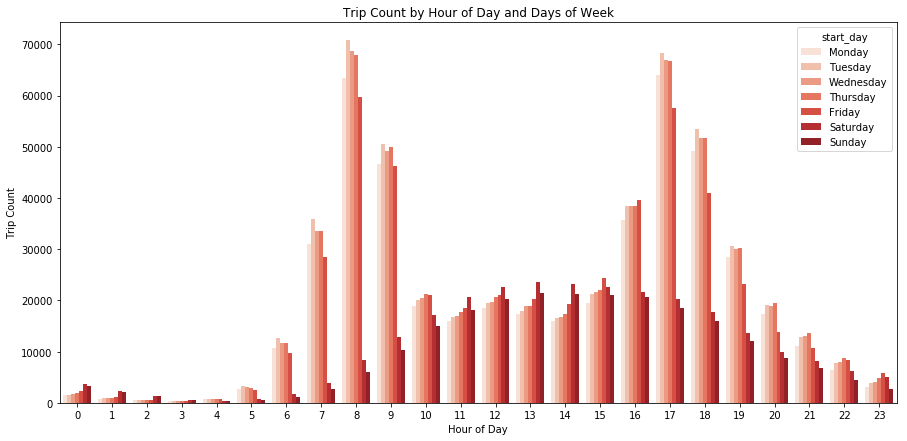

In [11]:
# How do hours of the day compare across days of the week in terms of trip counts?

plt.figure(figsize = [15, 7]);
dayord= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dow = pd.api.types.CategoricalDtype(ordered=True, categories=dayord)
df['start_day'] = df['start_day'].astype(dow) 
sb.countplot(data = df, x = 'start_hour', hue = 'start_day', palette = 'Reds');
plt.title('Trip Count by Hour of Day and Days of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Trip Count');

## Trip duration, Rider Genders and User Types

Analyzing data for trip duration, rider gender and user types revealing interesting details about the patterns

- Male riders take shorted duration trips
- Female riders take longer duration trips
- Mean trip duration for most riders is less than 1000 seconds
- For Subscriber users, the mean ride time is around 500 seconds
- For Customer users, ride time is longer than Subscribers


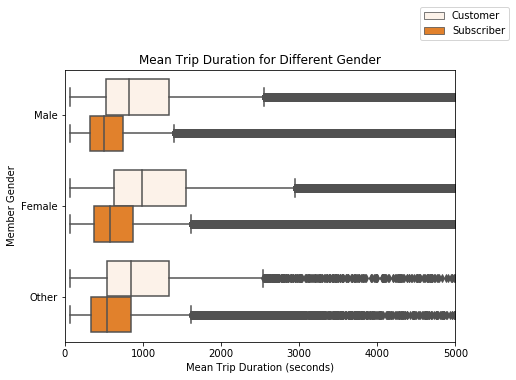

In [13]:
# Mean Trip Duration by Gender and User Type
colors = sb.color_palette()
plt.figure(figsize=(7,5))
sb.boxplot(data = df, y = 'member_gender', x = 'duration_sec', hue='user_type',color = colors[1])
plt.ylabel('Member Gender')
plt.xlabel('Mean Trip Duration (seconds)')
plt.xlim(0,5000)
plt.legend(bbox_to_anchor=(1, -.25, 0.15, 1.5))
plt.title('Mean Trip Duration for Different Gender');

## Rider Genders and Age Groups

Analyzing data for rider genders and age groups how trip patterns look for this variations in the users

- There are a lot of trips by male riders than female riders in each age group
- Trips by male riders are approximately 3 times as many as those made by female riders
- Most of the riders are in age group 30-40
- Second age group to have the most riders is 20-30


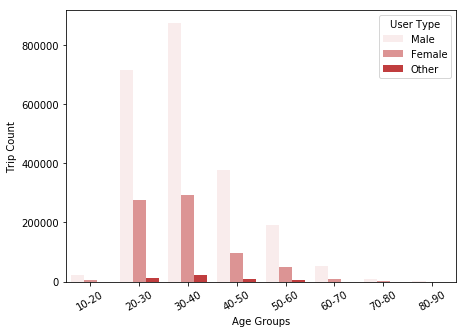

In [16]:
# How does user types distribute with respect to member gender?

age_groups = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
age_group = pd.api.types.CategoricalDtype(categories=age_groups,ordered=True)
df['age_group'] = df['age_group'].astype(age_group)

plt.figure(figsize=(7,5))
sb.countplot(data = df, x = 'age_group', color = colors[3], hue='member_gender')
plt.xticks(rotation=30)
plt.xlabel('Age Groups')
plt.ylabel('Trip Count')
plt.legend(title='User Type');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!